##Importing the necessary files


In [ ]:

import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:

tf.__version__

'2.17.0'

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jessicali9530/stanford-dogs-dataset")

print("Path to dataset files:", path)

100%|██████████| 750M/750M [00:21<00:00, 36.6MB/s]

Extracting model files...


Path to dataset files: /root/.cache/kagglehub/datasets/jessicali9530/stanford-dogs-dataset/versions/2


In [ ]:
import shutil

# Move the dataset to /content/stanford_dogs directory
destination_path = '/content/stanford_dogs'
shutil.copytree(path, destination_path)

print("Dataset moved to:", destination_path)


Dataset moved to: /content/stanford_dogs


In [ ]:
image_dir = '/content/stanford_dogs/images/Images'

In [ ]:
IMAGE_SIZE = 224
BATCH_SIZE = 64

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2)

train_generator = datagen.flow_from_directory(
    image_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='training')

val_generator = datagen.flow_from_directory(
    image_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='validation')

Found 16508 images belonging to 120 classes.
Found 4072 images belonging to 120 classes.


In [ ]:
x_train, y_train = next(train_generator)
x_val, y_val = next(val_generator)
print("Train batch shape:", x_train.shape, y_train.shape)
print("Validation batch shape:", x_val.shape, y_val.shape)


Train batch shape: (64, 224, 224, 3) (64, 120)
Validation batch shape: (64, 224, 224, 3) (64, 120)


In [ ]:

for image_batch, label_batch in train_generator:
  break
image_batch.shape, label_batch.shape

((64, 224, 224, 3), (64, 120))

In [ ]:
print (train_generator.class_indices)

labels = '\n'.join(sorted(train_generator.class_indices.keys()))

with open('labels.txt', 'w') as f:
  f.write(labels)

{'n02085620-Chihuahua': 0, 'n02085782-Japanese_spaniel': 1, 'n02085936-Maltese_dog': 2, 'n02086079-Pekinese': 3, 'n02086240-Shih-Tzu': 4, 'n02086646-Blenheim_spaniel': 5, 'n02086910-papillon': 6, 'n02087046-toy_terrier': 7, 'n02087394-Rhodesian_ridgeback': 8, 'n02088094-Afghan_hound': 9, 'n02088238-basset': 10, 'n02088364-beagle': 11, 'n02088466-bloodhound': 12, 'n02088632-bluetick': 13, 'n02089078-black-and-tan_coonhound': 14, 'n02089867-Walker_hound': 15, 'n02089973-English_foxhound': 16, 'n02090379-redbone': 17, 'n02090622-borzoi': 18, 'n02090721-Irish_wolfhound': 19, 'n02091032-Italian_greyhound': 20, 'n02091134-whippet': 21, 'n02091244-Ibizan_hound': 22, 'n02091467-Norwegian_elkhound': 23, 'n02091635-otterhound': 24, 'n02091831-Saluki': 25, 'n02092002-Scottish_deerhound': 26, 'n02092339-Weimaraner': 27, 'n02093256-Staffordshire_bullterrier': 28, 'n02093428-American_Staffordshire_terrier': 29, 'n02093647-Bedlington_terrier': 30, 'n02093754-Border_terrier': 31, 'n02093859-Kerry_blue

In [ ]:

!cat labels.txt

n02085620-Chihuahua
n02085782-Japanese_spaniel
n02085936-Maltese_dog
n02086079-Pekinese
n02086240-Shih-Tzu
n02086646-Blenheim_spaniel
n02086910-papillon
n02087046-toy_terrier
n02087394-Rhodesian_ridgeback
n02088094-Afghan_hound
n02088238-basset
n02088364-beagle
n02088466-bloodhound
n02088632-bluetick
n02089078-black-and-tan_coonhound
n02089867-Walker_hound
n02089973-English_foxhound
n02090379-redbone
n02090622-borzoi
n02090721-Irish_wolfhound
n02091032-Italian_greyhound
n02091134-whippet
n02091244-Ibizan_hound
n02091467-Norwegian_elkhound
n02091635-otterhound
n02091831-Saluki
n02092002-Scottish_deerhound
n02092339-Weimaraner
n02093256-Staffordshire_bullterrier
n02093428-American_Staffordshire_terrier
n02093647-Bedlington_terrier
n02093754-Border_terrier
n02093859-Kerry_blue_terrier
n02093991-Irish_terrier
n02094114-Norfolk_terrier
n02094258-Norwich_terrier
n02094433-Yorkshire_terrier
n02095314-wire-haired_fox_terrier
n02095570-Lakeland_terrier
n02095889-Sealyham_terrier
n02096051-Aired

In [ ]:
IMG_SHAPE = (224,224, 3)

# Create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                              include_top=False,weights='imagenet')

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
base_model.trainable = False

In [ ]:
model = tf.keras.Sequential([
  base_model,
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(120, activation='softmax')
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
print('Number of trainable variables = {}'.format(len(model.trainable_variables)))

Number of trainable variables = 0


In [ ]:
%%time

epochs = 10

# Check if val_generator is yielding data and fix it if it's empty
# Print the first batch from val_generator to check for data and shape
for data_batch, labels_batch in val_generator:
    print("Data batch shape:", data_batch.shape)
    print("Labels batch shape:", labels_batch.shape)
    break  # Exit the loop after printing the first batch

# Ensure val_generator yields data before proceeding
# Set validation_steps to the actual number of batches in val_generator
validation_steps = len(val_generator)

history = model.fit(train_generator,
                    epochs=epochs,
                    validation_steps=validation_steps)


Data batch shape: (64, 224, 224, 3)
Labels batch shape: (64, 120)
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


258/258 ━━━━━━━━━━━━━━━━━━━━ 71s 221ms/step - accuracy: 0.2530 - loss: 3.3595
Epoch 2/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 63s 180ms/step - accuracy: 0.6742 - loss: 1.1371
Epoch 3/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 83s 185ms/step - accuracy: 0.7444 - loss: 0.8423
Epoch 4/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 80s 180ms/step - accuracy: 0.7934 - loss: 0.6687
Epoch 5/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 83s 182ms/step - accuracy: 0.8183 - loss: 0.5650
Epoch 6/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 49s 184ms/step - accuracy: 0.8464 - loss: 0.4703
Epoch 7/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 47s 179ms/step - accuracy: 0.8660 - loss: 0.4108
Epoch 8/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 83s 181ms/step - accuracy: 0.8840 - loss: 0.3521
Epoch 9/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 49s 184ms/step - accuracy: 0.8965 - loss: 0.3119
Epoch 10/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 81s 180ms/step - accuracy: 0.9167 - loss: 0.2532
CPU times: user 8min 23s, sys: 2min 12s, total: 10min 35s
Wall time: 11min 29s


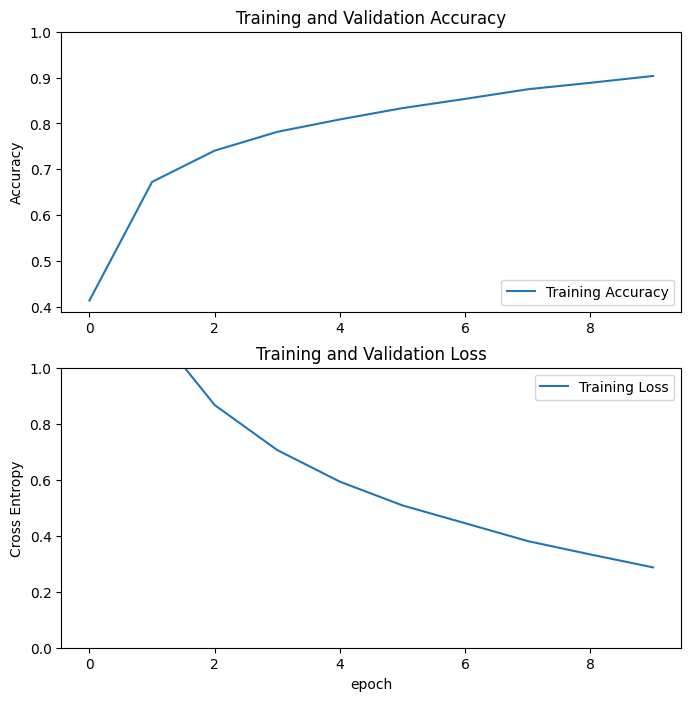

In [ ]:
acc = history.history['accuracy']


loss = history.history['loss']


plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')

plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')

plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
base_model.trainable = True

In [ ]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

Number of layers in the base model:  154


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 5, 5, 32)            │         368,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 32)                  │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 120)                 │           3,960 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,375,882 (12.88 MB)

 Trainable params: 2,234,072 (8.52 MB)

 Non-trainable params: 396,544 (1.51 MB)

 Optimizer params: 745,266 (2.84 MB)

In [ ]:
print('Number of trainable variables = {}'.format(len(model.trainable_variables)))

Number of trainable variables = 58


In [ ]:
saved_model_dir = 'save/fine_tuning'
tf.saved_model.save(model, saved_model_dir)




converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

In [ ]:
from google.colab import files

files.download('model.tflite')
files.download('labels.txt')